In [1]:
import pandas as pd
import numpy as np

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1= pd.read_csv('Clean_train.csv')
df1.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,2,0,1,0,0,0,1
1,1,1,0,38.0,71.2833,2,0,0,1,0,0,0
2,1,3,0,26.0,7.9250,1,1,0,0,0,0,1
3,1,1,0,35.0,53.1000,2,0,0,1,0,0,1
4,0,3,1,35.0,8.0500,1,0,1,0,0,0,1


In [4]:
X = df1.drop(['Survived'],axis='columns')
Y = df1.Survived

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

         Specs        Score
3         Fare  4518.319091
6     Title_Mr   112.805785
1          Sex    92.702447
7    Title_Mrs    89.474177
5   Title_Miss    79.531749
0       Pclass    30.873699
2          Age    19.724599
10  Embarked_S     5.489205
4   FamilySize     0.336787
8   Title_Rare     0.126121
9   Embarked_Q     0.010847


In [6]:
def normalise_Age(i):
    return round((i-0.42)/79.58,3)

def normalise_Fare(i):
    return round(i/512,3)

In [7]:
df2= df1.copy()
df2['Age']= df2['Age'].apply(normalise_Age)
df2['Fare']= df2['Fare'].apply(normalise_Fare)

In [8]:
df2

,Survived,Pclass,Sex,Age,Fare,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,0,3,1,0.271,0.014,2,0,1,0,0,0,1
1,1,1,0,0.472,0.139,2,0,0,1,0,0,0
2,1,3,0,0.321,0.015,1,1,0,0,0,0,1
3,1,1,0,0.435,0.104,2,0,0,1,0,0,1
4,0,3,1,0.435,0.016,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.334,0.025,1,0,0,0,1,0,1
887,1,1,0,0.233,0.059,1,1,0,0,0,0,1
888,0,3,0,0.259,0.046,4,1,0,0,0,0,1
889,1,1,1,0.321,0.059,1,0,1,0,0,0,0


In [9]:
X_2 = df2.drop(['Survived'],axis='columns')
Y_2 = df2.Survived

In [10]:
X_2

,Pclass,Sex,Age,Fare,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,3,1,0.271,0.014,2,0,1,0,0,0,1
1,1,0,0.472,0.139,2,0,0,1,0,0,0
2,3,0,0.321,0.015,1,1,0,0,0,0,1
3,1,0,0.435,0.104,2,0,0,1,0,0,1
4,3,1,0.435,0.016,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0.334,0.025,1,0,0,0,1,0,1
887,1,0,0.233,0.059,1,1,0,0,0,0,1
888,3,0,0.259,0.046,4,1,0,0,0,0,1
889,1,1,0.321,0.059,1,0,1,0,0,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [12]:
def find_best_model(X_train, X_test, y_train, y_test):
    # Logistic Regression
    logreg = LogisticRegression(max_iter = 800, random_state = 42)
    logreg.fit(X_train, y_train)
    y_pred_logreg = logreg.predict(X_test)
    logreg_acc = round(metrics.accuracy_score(y_test, y_pred_logreg) * 100, 2)
    
    # Random Forest
    random_forest = RandomForestClassifier(random_state = 42)
    random_forest.fit(X_train, y_train)
    y_pred_randfor = random_forest.predict(X_test)
    random_forest_acc = round(metrics.accuracy_score(y_test, y_pred_randfor) * 100, 2)
    
    # KNN
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    knn_acc=round(metrics.accuracy_score(y_test, y_pred_knn) * 100, 2)

    # SVM
    rbf_svc = SVC(kernel='rbf')
    rbf_svc.fit(X_train,y_train)
    y_pred_svm=rbf_svc.predict(X_test)
    svm_acc=round(metrics.accuracy_score(y_test, y_pred_svm) * 100, 2)
    
    # Naive Bayes
    nb=GaussianNB()
    nb.fit(X_train,y_train)
    y_pred_nb=nb.predict(X_test)
    nb_acc=round(metrics.accuracy_score(y_test, y_pred_nb) * 100, 2)

    
    model_df = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVM','Naive Bayes'],
                       'Score': [logreg_acc, random_forest_acc, knn_acc, svm_acc, nb_acc]})
    print(model_df.sort_values('Score', ascending = False).reset_index(drop = True))

In [13]:
find_best_model(X_train, X_test, y_train, y_test)

                 Model  Score
0  Logistic Regression  83.80
1        Random Forest  83.80
2          Naive Bayes  81.01
3                  KNN  72.63
4                  SVM  70.95


In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2,Y_2, test_size=0.2)

In [15]:
find_best_model(X_train2, X_test2, y_train2, y_test2)

                 Model  Score
0                  SVM  79.33
1  Logistic Regression  78.77
2        Random Forest  77.09
3                  KNN  76.54
4          Naive Bayes  70.95


In [16]:
rfc = RandomForestClassifier(random_state=42, 
                             n_jobs=-1 # Use all cores on your machine
                            )
param_grid = { 
    'n_estimators': [100, 200, 300], # The number of boosting stages to perform
    'max_features': ['auto'], # The number of features to consider when looking for the best split
    'max_depth' : [4, 6, 8], # The maximum depth of the individual regression estimators.
    'criterion' :['gini', 'entropy'] #Function to measure the quality of a split
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring = 'accuracy', verbose = 10)
CV_rfc.fit(X, Y)
print('')
print('Best hyperparameters:',CV_rfc.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 1/5; 1/18] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.844 total time=   3.2s
[CV 2/5; 1/18] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 2/5; 1/18] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.820 total time=   0.0s
[CV 3/5; 1/18] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 3/5; 1/18] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.826 total time=   0.0s
[CV 4/5; 1/18] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 4/5; 1/18] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.798 total time=   0.0s
[CV 5/5; 1/18] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 5/5; 1/18] END criterion=gini, max_de

[CV 1/5; 9/18] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.838 total time=   0.2s
[CV 2/5; 9/18] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300
[CV 2/5; 9/18] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.809 total time=   0.2s
[CV 3/5; 9/18] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300
[CV 3/5; 9/18] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.854 total time=   0.1s
[CV 4/5; 9/18] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300
[CV 4/5; 9/18] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.792 total time=   0.1s
[CV 5/5; 9/18] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300
[CV 5/5; 9/18] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.826 total time=   0.1s
[CV 1/5; 10/18] START criterion=entropy, max_depth=4, max_features=auto

[CV 1/5; 17/18] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.832 total time=   0.1s
[CV 2/5; 17/18] START criterion=entropy, max_depth=8, max_features=auto, n_estimators=200
[CV 2/5; 17/18] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.809 total time=   0.1s
[CV 3/5; 17/18] START criterion=entropy, max_depth=8, max_features=auto, n_estimators=200
[CV 3/5; 17/18] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.854 total time=   0.1s
[CV 4/5; 17/18] START criterion=entropy, max_depth=8, max_features=auto, n_estimators=200
[CV 4/5; 17/18] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.798 total time=   0.1s
[CV 5/5; 17/18] START criterion=entropy, max_depth=8, max_features=auto, n_estimators=200
[CV 5/5; 17/18] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.820 total time=   0.1s
[CV 1/5; 18/18] START criterion=ent

In [17]:
predictions = CV_rfc.predict(X_test)
CV_rfc_acc = round(metrics.accuracy_score(y_test, predictions) * 100, 2)
print(CV_rfc_acc)

85.47


In [18]:
rfc2 = RandomForestClassifier(random_state=42, 
                             n_jobs=-1 # Use all cores on your machine
                            )
param_grid = { 
    'n_estimators': [100, 200, 300], # The number of boosting stages to perform
    'max_features': ['auto'], # The number of features to consider when looking for the best split
    'max_depth' : [4, 6, 8], # The maximum depth of the individual regression estimators.
    'criterion' :['gini', 'entropy'] #Function to measure the quality of a split
}
CV_rfc2 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring = 'accuracy', verbose = 10)
CV_rfc2.fit(X_2, Y_2)
print('')
print('Best hyperparameters:',CV_rfc2.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 1/5; 1/18] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.855 total time=   0.1s
[CV 2/5; 1/18] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 2/5; 1/18] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.820 total time=   0.1s
[CV 3/5; 1/18] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 3/5; 1/18] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.820 total time=   0.1s
[CV 4/5; 1/18] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 4/5; 1/18] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.798 total time=   0.1s
[CV 5/5; 1/18] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 5/5; 1/18] END criterion=gini, max_de

[CV 1/5; 9/18] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.827 total time=   0.2s
[CV 2/5; 9/18] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300
[CV 2/5; 9/18] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.809 total time=   0.3s
[CV 3/5; 9/18] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300
[CV 3/5; 9/18] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.843 total time=   0.2s
[CV 4/5; 9/18] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300
[CV 4/5; 9/18] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.792 total time=   0.2s
[CV 5/5; 9/18] START criterion=gini, max_depth=8, max_features=auto, n_estimators=300
[CV 5/5; 9/18] END criterion=gini, max_depth=8, max_features=auto, n_estimators=300;, score=0.831 total time=   0.2s
[CV 1/5; 10/18] START criterion=entropy, max_depth=4, max_features=auto

[CV 1/5; 17/18] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.816 total time=   0.1s
[CV 2/5; 17/18] START criterion=entropy, max_depth=8, max_features=auto, n_estimators=200
[CV 2/5; 17/18] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.820 total time=   0.1s
[CV 3/5; 17/18] START criterion=entropy, max_depth=8, max_features=auto, n_estimators=200
[CV 3/5; 17/18] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.860 total time=   0.1s
[CV 4/5; 17/18] START criterion=entropy, max_depth=8, max_features=auto, n_estimators=200
[CV 4/5; 17/18] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.792 total time=   0.1s
[CV 5/5; 17/18] START criterion=entropy, max_depth=8, max_features=auto, n_estimators=200
[CV 5/5; 17/18] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=200;, score=0.826 total time=   0.1s
[CV 1/5; 18/18] START criterion=ent

In [19]:
predictions2 = CV_rfc2.predict(X_test2)
CV_rfc_acc2 = round(metrics.accuracy_score(y_test2, predictions2) * 100, 2)
print(CV_rfc_acc2)

79.33


Text(69.0, 0.5, 'Truth')

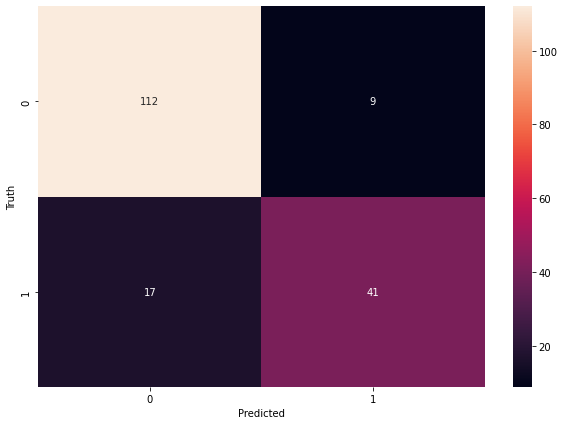

In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predictions)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Random Forest without normalised data produced highest accuracy of 85%